In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import json

In [3]:
with open("llama-3-8b/full_finetune-llama-3-8b-3epoch.json") as f:
    full_bf16 = json.load(f)
with open("llama-3-8b/full_finetune-llama-3-8b-fp32-3epoch.json") as f:
    full_fp32 = json.load(f)
with open("llama-3-8b/lora-llama-3-8b-r128-3epoch.json") as f:
    lora = json.load(f)
with open("llama-3-8b/pissa-llama-3-8b-r128-3epoch.json") as f:
    pissa = json.load(f)
with open("llama-3-8b/qlora-llama-3-8b-r128-3epoch.json") as f:
    qlora = json.load(f)
with open("llama-3-8b/loftq-llama-3-8b-r128-1iter.json") as f:
    loftq_iter1 = json.load(f)
with open("llama-3-8b/loftq-llama-3-8b-r128-5iter.json") as f:
    loftq_iter5 = json.load(f)
with open("llama-3-8b/pissa-llama-3-8b-r128-1iter-3epoch.json") as f:
    qpissa_iter1 = json.load(f)
with open("llama-3-8b/pissa-llama-3-8b-r128-5iter-3epoch.json") as f:
    qpissa_iter5 = json.load(f)

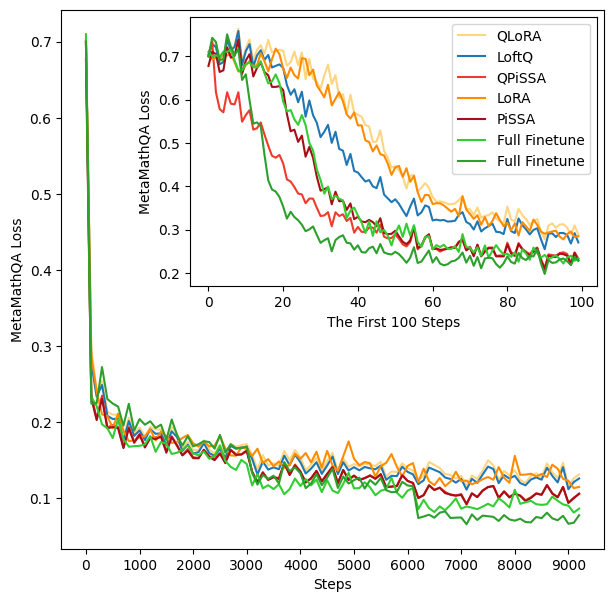

In [5]:
fig, axs = plt.subplots(figsize=(7, 7))
axs.plot([lh["loss"] for lh in qlora["log_history"][:-1:100]], label="QLoRA",color="#FFD580")
#axs.plot([lh["loss"] for lh in loftq_iter1["log_history"][:-1:100]], label="4bit LoftQ 1-iter",color="#9ecae1")
axs.plot([lh["loss"] for lh in loftq_iter5["log_history"][:-1:100]], label="LoftQ",color="#1f77b4")
#axs.plot([lh["loss"] for lh in qpissa_iter1["log_history"][:-1:100]], label="4bit PiSSA 1-iter",color="#fcbba1")
axs.plot([lh["loss"] for lh in qpissa_iter5["log_history"][:-1:100]], label="QPiSSA",color="#ef3b2c")
axs.plot([lh["loss"] for lh in lora["log_history"][:-1:100]], label="LoRA",color="#FF8C00")
axs.plot([lh["loss"] for lh in pissa["log_history"][:-1:100]], label="PISSA",color="#a50f15")
axs.plot([lh["loss"] for lh in full_bf16["log_history"][:-1:100]], label="Full Finetune",color='#32CD32')
axs.plot([lh["loss"] for lh in full_fp32["log_history"][:-1:100]], label="Full Finetune",color='#2ca02c')
#axs.set_ylim((0.08,0.4))
axs.set_xlabel("Steps")
axs.set_ylabel("MetaMathQA Loss")
    
axins = inset_axes(axs, width="75%", height="50%", loc="upper right")
axins.plot([lh["loss"] for lh in qlora["log_history"][:100]], label="QLoRA",color="#FFD580")
#axins.plot([lh["loss"] for lh in loftq_iter1["log_history"][:100]], label="4bit LoftQ 1-iter",color="#9ecae1")
axins.plot([lh["loss"] for lh in loftq_iter5["log_history"][:100]], label="LoftQ",color="#1f77b4")
#axins.plot([lh["loss"] for lh in qpissa_iter1["log_history"][:100]], label="4bit PiSSA 1-iter",color="#fcbba1")
axins.plot([lh["loss"] for lh in qpissa_iter5["log_history"][:100]], label="QPiSSA",color="#ef3b2c")
axins.plot([lh["loss"] for lh in lora["log_history"][:100]], label="LoRA",color="#FF8C00")
axins.plot([lh["loss"] for lh in pissa["log_history"][:100]], label="PiSSA",color="#a50f15")
axins.plot([lh["loss"] for lh in full_bf16["log_history"][:100]], label="Full Finetune",color='#32CD32')
axins.plot([lh["loss"] for lh in full_fp32["log_history"][:100]], label="Full Finetune",color='#2ca02c')
axins.set_xlabel("The First 100 Steps")
axins.set_ylabel("MetaMathQA Loss")
axins.legend()

axs.set_xticks([j * 10 for j in range(10)])
axs.set_xticklabels([j * 1000 for j in range(10)])
plt.savefig("more_step_loss_llama3.pdf", bbox_inches="tight")

In [4]:
import numpy as np
full_gsm8k=[
    0.7558756633813495,
0.7717968157695224,
0.7945413191811979,
0.8089461713419257,
0.8097043214556482,
0.8142532221379833,
0.8119787717968158,
0.8188021228203184,
0.819560272934041
]
lora_gsm8k=[
    0.7513267626990144,
0.7558756633813495,
0.7899924184988628,
0.7892342683851402,
0.7892342683851402,
0.7899924184988628,
0.8021228203184231,
0.7922668688400303,
0.7899924184988628,
]
pissa_gsm8k=[
    0.7657316148597423,
0.7846853677028052,
0.7725549658832449,
0.7945413191811979,
0.7968157695223654,
0.8097043214556482,
0.8271417740712661,
0.8248673237300985,
0.8233510235026535,
]
qlora_gsm8k=[
    0.7240333586050038,
0.7657316148597423,
0.7528430629264594,
0.7740712661106899,
0.7740712661106899,
0.7778620166793025,
0.7831690674753601,
0.77710386656558,
0.7854435178165277,
]
loftq_gsm8k_1iter=[
0.7376800606520091,
0.7710386656557998,
0.7604245640636846,
0.7862016679302501,
0.7748294162244125,
0.7831690674753601,
0.7824109173616376,
0.77710386656558,
0.7862016679302501,
0.7740712661106899,
]
loftq_gsm8k_5iter=[
0.7460197119029568,
0.7680060652009097,
0.7452615617892343,
0.7862016679302501,
0.77710386656558,
0.7877179681576952,
0.7869598180439727,
0.799090219863533,
0.7968157695223654,
0.7975739196360879,
]
qpissa_gsm8k_1iter=[
    0.7498104624715694,
0.7748294162244125,
0.7664897649734648,
0.796057619408643,
0.7952994692949203,
0.8028809704321456,
0.796057619408643,
0.7998483699772555,
0.8028809704321456,
]
qpissa_gsm8k_5iter=[
0.759666413949962,
0.77710386656558,
0.7839272175890827,
0.7831690674753601,
0.7937831690674754,
0.8142532221379833,
0.8089461713419257,
0.8104624715693708,
0.8104624715693708,
]
groups = 9
bars_per_group = 6
bar_width = 0.2
group_width = bar_width * bars_per_group + bar_width
fig, axs = plt.subplots(figsize=(14, 7))
axs.bar(np.arange(groups) * group_width + 0 * bar_width,[i * 100 for i in qlora_gsm8k[:groups]],width=bar_width,label="QLoRA",color="#FFD580")
#axs.bar(np.arange(groups) * group_width + 1 * bar_width,[i * 100 for i in loftq_gsm8k_1iter[:groups]],width=bar_width,label="4bit LoftQ 1-iter",color="#9ecae1")
axs.bar(np.arange(groups) * group_width + 1 * bar_width,[i * 100 for i in loftq_gsm8k_5iter[:groups]],width=bar_width,label="LoftQ",color="#1f77b4")
#axs.bar(np.arange(groups) * group_width + 3 * bar_width,[i * 100 for i in qpissa_gsm8k_1iter[:groups]],width=bar_width,label="4bit PiSSA 1-iter",color="#fcbba1")
axs.bar(np.arange(groups) * group_width + 2 * bar_width,[i * 100 for i in qpissa_gsm8k_5iter[:groups]],width=bar_width,label="QPiSSA",color="#ef3b2c")
axs.bar(np.arange(groups) * group_width + 3 * bar_width,[i * 100 for i in lora_gsm8k[:groups]],width=bar_width,label="LoRA",color="#FF8C00")
axs.bar(np.arange(groups) * group_width + 4 * bar_width,[i * 100 for i in pissa_gsm8k[:groups]],width=bar_width,label="PiSSA",color="#a50f15")
axs.bar(np.arange(groups) * group_width + 5 * bar_width,[i * 100 for i in full_gsm8k[:groups]],width=bar_width,label="Full Finetune",color='#32CD32')
axs.set_xticks(np.arange(groups) * group_width + group_width / 2 - bar_width)
axs.set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000][:groups])
axs.set_xlabel("Steps")
axs.set_ylabel("GSM8K Accuracy (%)")
axs.set_xlim((-0.25,12.45))
axs.set_ylim((72,83))
axs.legend()
plt.savefig("more_step_gsm8k_llama3.pdf", bbox_inches="tight")

In [7]:
import numpy as np
full_gsm8k=[
0.5852918877937832,
0.6345716451857468,
0.6755117513267627,
0.7126611068991661,
0.7247915087187263,
0.7308567096285065,
0.7520849128127369,
0.7361637604245641,
0.7460197119029568,
]
lora_gsm8k=[
0.7558756633813495,
0.7748294162244125,
0.7808946171341926,
0.8013646702047005,
0.7907505686125853,
0.7892342683851402,
0.7930250189537529,
0.799090219863533,
0.8028809704321456,
0.8119787717968158,
]
pissa_gsm8k=[
0.7642153146322972,
0.7717968157695224,
0.778620166793025,
0.7710386656557998,
0.8028809704321456,
0.8013646702047005,
0.8051554207733131,
0.8028809704321456,
0.8089461713419257,
0.8028809704321456,
]
groups = 9
bars_per_group = 3
bar_width = 0.2
group_width = bar_width * bars_per_group + bar_width
fig, axs = plt.subplots(figsize=(21, 7))
axs.bar(np.arange(groups) * group_width + 0 * bar_width,[i * 100 for i in lora_gsm8k[:groups]],width=bar_width,label="LoRA",color="#FF8C00")
axs.bar(np.arange(groups) * group_width + 1 * bar_width,[i * 100 for i in pissa_gsm8k[:groups]],width=bar_width,label="PiSSA",color="#a50f15")
axs.bar(np.arange(groups) * group_width + 2 * bar_width,[i * 100 for i in full_gsm8k[:groups]],width=bar_width,label="Full Finetune",color='#32CD32')
axs.set_xticks(np.arange(groups) * group_width + group_width / 2 - bar_width)
axs.set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000][:groups])
axs.set_xlabel("Steps")
axs.set_ylabel("GSM8K Accuracy (%)")
axs.set_xlim((-0.25,7))
axs.set_ylim((75,83))
axs.legend()
plt.savefig("more_step_gsm8k_gemma.pdf", bbox_inches="tight")

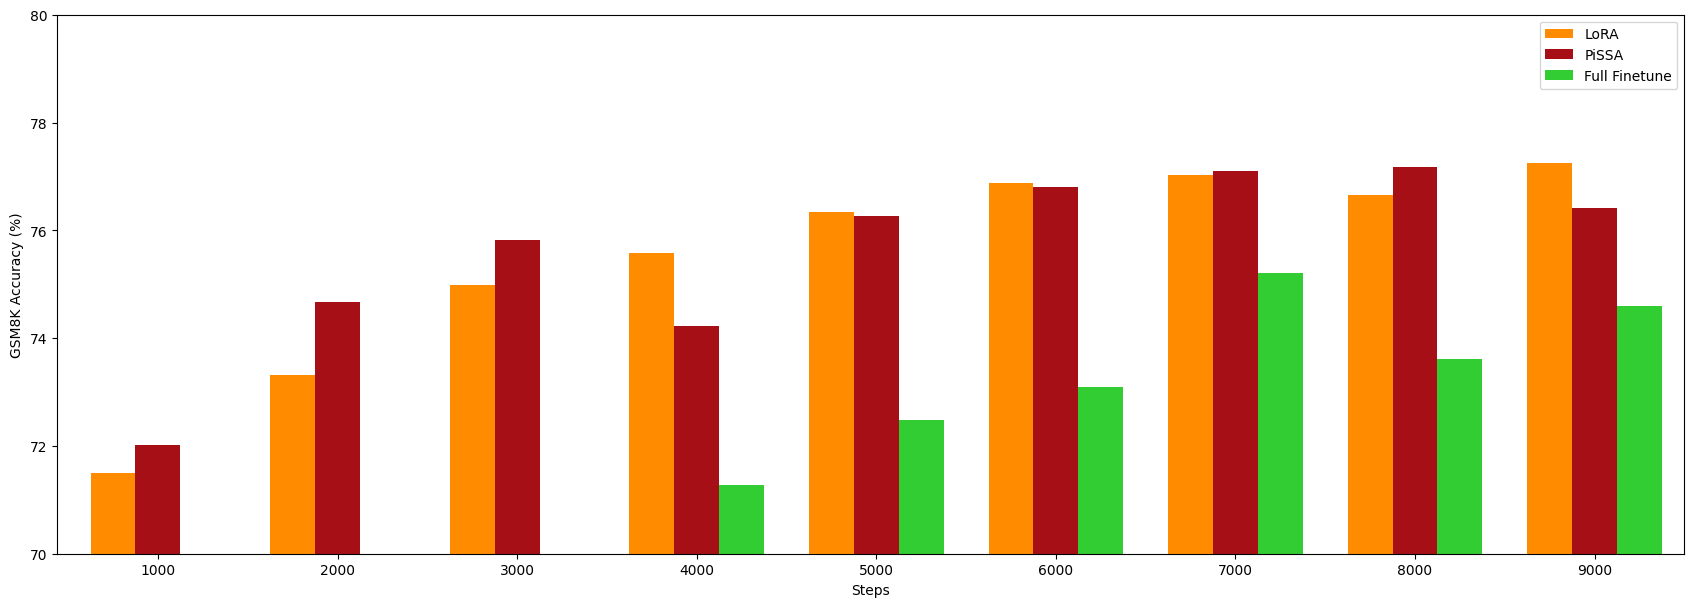

In [3]:
import numpy as np
full_gsm8k=[
    0.5852918877937832,
0.6345716451857468,
0.6755117513267627,
0.7126611068991661,
0.7247915087187263,
0.7308567096285065,
0.7520849128127369,
0.7361637604245641,
0.7460197119029568,
]
lora_gsm8k=[
0.7149355572403336,
0.733131159969674,
0.7498104624715694,
0.7558756633813495,
0.7634571645185747,
0.7687642153146323,
0.7702805155420773,
0.7664897649734648,
0.7725549658832449,
0.77710386656558,
]
pissa_gsm8k=[
0.7202426080363912,
0.7467778620166793,
0.7581501137225171,
0.7422289613343442,
0.7626990144048522,
0.7680060652009097,
0.7710386656557998,
0.7717968157695224,
0.7642153146322972,
0.7680060652009097,
]
groups = 9
bars_per_group = 3
bar_width = 0.2
group_width = bar_width * bars_per_group + bar_width
fig, axs = plt.subplots(figsize=(21, 7))
axs.bar(np.arange(groups) * group_width + 0 * bar_width,[i * 100 for i in lora_gsm8k[:groups]],width=bar_width,label="LoRA",color="#FF8C00")
axs.bar(np.arange(groups) * group_width + 1 * bar_width,[i * 100 for i in pissa_gsm8k[:groups]],width=bar_width,label="PiSSA",color="#a50f15")
axs.bar(np.arange(groups) * group_width + 2 * bar_width,[i * 100 for i in full_gsm8k[:groups]],width=bar_width,label="Full Finetune",color='#32CD32')
axs.set_xticks(np.arange(groups) * group_width + group_width / 2 - bar_width)
axs.set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000][:groups])
axs.set_xlabel("Steps")
axs.set_ylabel("GSM8K Accuracy (%)")
axs.set_xlim((-0.25,7))
axs.set_ylim((70,80))
axs.legend()
plt.savefig("more_step_gsm8k_mistral.pdf", bbox_inches="tight")

In [ ]:
"""
'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'
"""
